In [41]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [42]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [46]:
 nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [47]:
df = pd.read_csv('flipkart_product.csv', encoding='ISO-8859-1', low_memory=False)


In [48]:
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [49]:
# Drop 'Product Name' and 'Price' columns
df.drop(columns=['ProductName', 'Price'], inplace=True)


In [50]:
import pandas as pd
import re

# Sample data (replace with your DataFrame)
# df = pd.read_csv("your_dataset.csv")

# Define a function to clean and keep only alphanumeric characters
def clean_text(text):
    # Check if the input is a string; if not, convert it to a string
    if not isinstance(text, str):
        text = str(text)

    # Use a regular expression to remove non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

# Apply the clean_text function to the "Summary" and "Review" columns
df['Summary'] = df['Summary'].apply(clean_text)
df['Review'] = df['Review'].apply(clean_text)

# Display the DataFrame with cleaned columns
print(df[['Summary', 'Review']])


                                                  Summary           Review
0       Great cooler excellent air flow and for this p...            Super
1                   Best budget 2 fit cooler Nice cooling          Awesome
2       The quality is good but the power of air is de...             Fair
3                       Very bad product its a only a fan  Useless product
4                                           Ok ok product             Fair
...                                                   ...              ...
189869                                             Thanks         Terrific
189870                                               Good         Terrific
189871                                              Super         Just wow
189872                                               Good  Worth the money
189873                                                nan              nan

[189874 rows x 2 columns]


In [51]:
df.isnull().sum()

Rate       1
Review     0
Summary    0
dtype: int64

In [52]:


# Drop rows with missing values (NaN)
df.dropna(inplace=True)

# Lowercase the text data
df['Review'] = df['Review'].str.lower()
df['Summary'] = df['Summary'].str.lower()


In [53]:
df.shape

(189873, 3)

In [17]:
df.isnull().sum()

Rate       0
Review     0
Summary    0
dtype: int64

In [54]:
# Assuming 'df' is your DataFrame
# Convert the 'rating' column to numeric, and filter the DataFrame
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df = df.dropna(subset=['Rate'], how='any', axis=0)


In [19]:
df.shape

(189869, 3)

In [20]:
df['Rate'].value_counts()

5.0    108694
4.0     39653
1.0     19607
3.0     15681
2.0      6234
Name: Rate, dtype: int64

<Axes: title={'center': 'Count of Reviews by Stars'}>

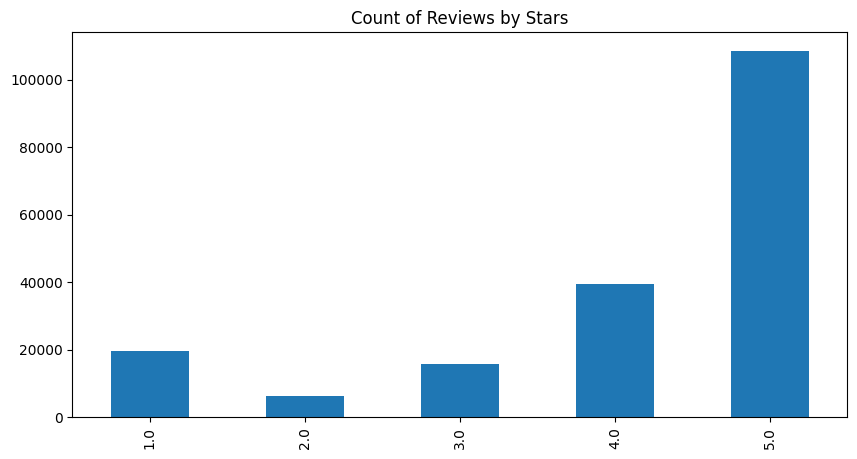

In [ ]:
df['Rate']. value_counts().sort_index() \
.plot(kind='bar', title='Count of Reviews by Stars',
     figsize=(10, 5))

In [ ]:
example=df['Summary'][49]
print(example)

perfect product for large size room


In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['perfect', 'product', 'for', 'large', 'size', 'room']

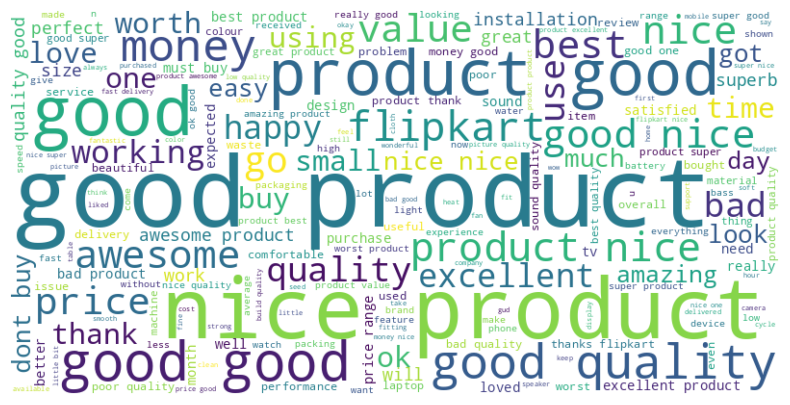

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data (replace with your DataFrame)
# df = pd.read_csv("your_dataset.csv")

# Combine all summary texts into a single string
text = ' '.join(df['Summary'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('perfect', 'JJ'),
 ('product', 'NN'),
 ('for', 'IN'),
 ('large', 'JJ'),
 ('size', 'NN'),
 ('room', 'NN')]

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S perfect/JJ product/NN for/IN large/JJ size/NN room/NN)


In [55]:
# Define a function to remove stopwords
def remove_stopwords(Summary):
    stop_words = set(stopwords.words('english'))

    words = Summary.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the specified column
df['Summary'] = df['Summary'].apply(remove_stopwords)

<ipython-input-55-047188d39fb3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = df['Summary'].apply(remove_stopwords)


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Sample data (replace with your DataFrame)
# df = pd.read_csv("your_dataset.csv")

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a text
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Lemmatize each word and join them back into a sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatize_text function to the "summary" column
df['lemmatized_summary'] = df['Summary'].apply(lemmatize_text)




<ipython-input-26-bd8bc47b9c14>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_summary'] = df['Summary'].apply(lemmatize_text)


In [ ]:
 df

,Rate,Review,Summary,lemmatized_summary
0,5.0,super,great cooler excellent air flow price amazing ...,great cooler excellent air flow price amazing ...
1,5.0,awesome,best budget 2 fit cooler nice cooling,best budget 2 fit cooler nice cooling
2,3.0,fair,quality good power air decent,quality good power air decent
3,1.0,useless product,bad product fan,bad product fan
4,3.0,fair,ok ok product,ok ok product
...,...,...,...,...
189868,5.0,terrific,good,good
189869,5.0,terrific,thanks,thanks
189870,5.0,terrific,good,good
189871,5.0,just wow,super,super


In [ ]:
df = df.drop('lemmatized_summary', axis=1)


In [56]:
df.insert(0, 'id', range(1, len(df) + 1))


In [ ]:
df

,id,Rate,Review,Summary
0,1,5.0,super,great cooler excellent air flow price amazing ...
1,2,5.0,awesome,best budget 2 fit cooler nice cooling
2,3,3.0,fair,quality good power air decent
3,4,1.0,useless product,bad product fan
4,5,3.0,fair,ok ok product
...,...,...,...,...
189868,189865,5.0,terrific,good
189869,189866,5.0,terrific,thanks
189870,189867,5.0,terrific,good
189871,189868,5.0,just wow,super


#VADER MODEL
 It is a lexicon and rule-based sentiment analysis tool designed for social media text. It's specifically tuned to recognize sentiments in text that are often informal and express emotions.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-57-97a88ce9cd98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Summary'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-57-97a88ce9cd98>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive_sentiment'] = df['sentiment'].apply(lambda x: x['pos'])
<ipython-input-57-97a88ce9cd98>:14: SettingWithCopyWarning: 
A value is trying t

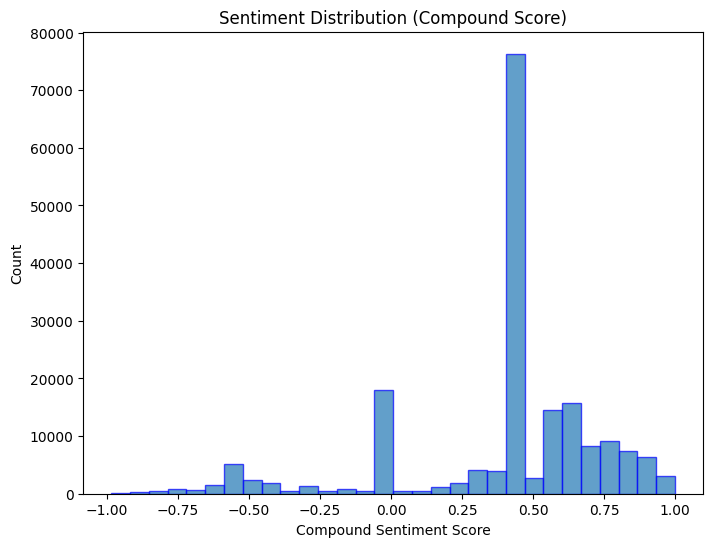

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the review content
df['sentiment'] = df['Summary'].apply(lambda x: sid.polarity_scores(x))

# Extract sentiment scores (positive, negative, and compound) into separate columns
df['positive_sentiment'] = df['sentiment'].apply(lambda x: x['pos'])
df['negative_sentiment'] = df['sentiment'].apply(lambda x: x['neg'])
df['neutral_sentiment'] = df['sentiment'].apply(lambda x: x['neu'])
df['compound_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

# Drop the 'sentiment' column (optional)
df.drop(columns=['sentiment'], inplace=True)

# Analyze sentiment distribution
plt.figure(figsize=(8, 6))
df['compound_sentiment'].plot.hist(bins=30, edgecolor='blue', alpha=0.7)
plt.title('Sentiment Distribution (Compound Score)')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Count')
plt.show()

In [58]:
df

,id,Rate,Review,Summary,positive_sentiment,negative_sentiment,neutral_sentiment,compound_sentiment
0,1,5.0,super,great cooler excellent air flow price amazing ...,0.760,0.000,0.240,0.9501
1,2,5.0,awesome,best budget 2 fit cooler nice cooling,0.760,0.000,0.240,0.8591
2,3,3.0,fair,quality good power air decent,0.420,0.000,0.580,0.4404
3,4,1.0,useless product,bad product fan,0.338,0.515,0.147,-0.2960
4,5,3.0,fair,ok ok product,0.815,0.000,0.185,0.5267
...,...,...,...,...,...,...,...,...
189868,189865,5.0,terrific,good,1.000,0.000,0.000,0.4404
189869,189866,5.0,terrific,thanks,1.000,0.000,0.000,0.4404
189870,189867,5.0,terrific,good,1.000,0.000,0.000,0.4404
189871,189868,5.0,just wow,super,1.000,0.000,0.000,0.5994


In [ ]:
sid.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [59]:

from tqdm.notebook import tqdm
#Run the polarity score on the entire dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row[ 'Summary']
  myid= row['id']
  res[myid] = sid.polarity_scores(text)

  0%|          | 0/189869 [00:00<?, ?it/s]

In [60]:
res

{1: {'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compound': 0.9501},
 2: {'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compound': 0.8591},
 3: {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404},
 4: {'neg': 0.515, 'neu': 0.147, 'pos': 0.338, 'compound': -0.296},
 5: {'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.5267},
 6: {'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'compound': 0.8462},
 7: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 8: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 9: {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423},
 10: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 11: {'neg': 0.0, 'neu': 0.214, 'pos': 0.786, 'compound': 0.9001},
 12: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 13: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 14: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719},
 15: {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.7783},
 16: {'neg': 0.0, 'neu'

In [61]:
df.shape

(189869, 8)

#VADER RESULT

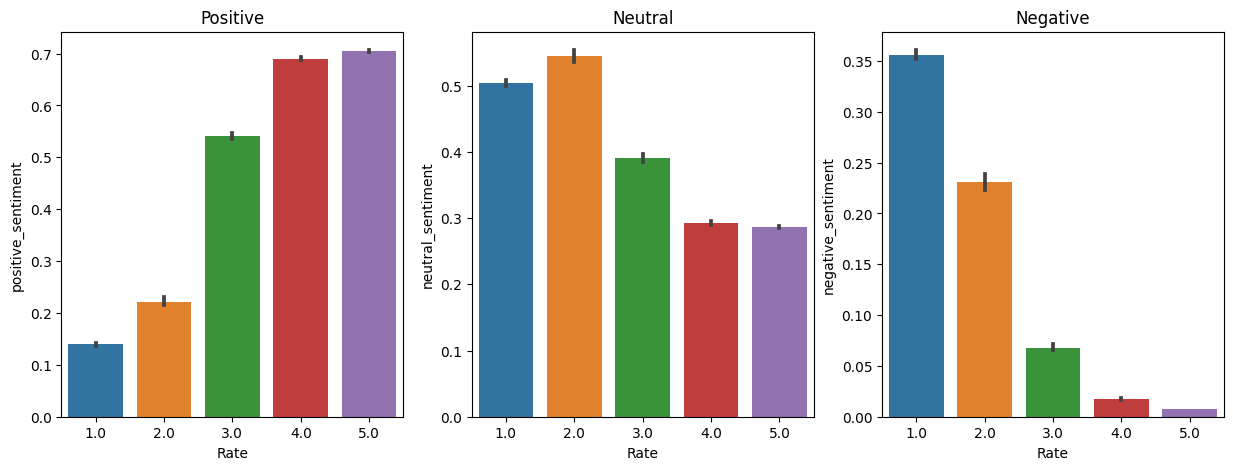

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=df, x='Rate', y='positive_sentiment', ax=axs[0])
sns.barplot(data=df, x='Rate', y='neutral_sentiment', ax=axs[1])
sns.barplot(data=df, x='Rate', y='negative_sentiment', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title('Neutral')
axs[2].set_title("Negative")
plt.show()

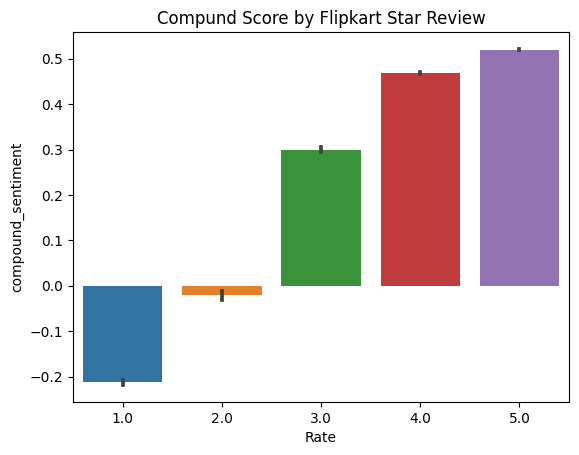

In [ ]:
ax=sns.barplot(data=df, x='Rate', y="compound_sentiment")
ax.set_title('Compund Score by Flipkart Star Review')
plt.show()

In [ ]:
df.shape

(189869, 8)

#TEXTBLOB
It is a popular Python library for processing textual data, providing simple and intuitive interfaces for common NLP tasks like part-of-speech tagging, sentiment analysis, and language translation.

In [62]:
from textblob import TextBlob

In [63]:
ress=TextBlob("The best movie").sentiment
ress

Sentiment(polarity=1.0, subjectivity=0.3)

In [64]:
# Create empty lists to store the polarity and subjectivity scores
polarity_scores = []
subjectivity_scores = []

# Apply sentiment analysis using TextBlob to the 'summary' column
for summary in df['Summary']:
    sentiment = TextBlob(summary).sentiment
    polarity_scores.append(sentiment.polarity)
    subjectivity_scores.append(sentiment.subjectivity)




In [65]:
df['polarity_scores'] = polarity_scores
df['subjectivity_scores'] = subjectivity_scores


<ipython-input-65-7f8117b263b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_scores'] = polarity_scores
<ipython-input-65-7f8117b263b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity_scores'] = subjectivity_scores


In [66]:
df.head()

,id,Rate,Review,Summary,positive_sentiment,negative_sentiment,neutral_sentiment,compound_sentiment,polarity_scores,subjectivity_scores
0,1,5.0,super,great cooler excellent air flow price amazing ...,0.760,0.000,0.240,0.9501,0.725000,0.812500
1,2,5.0,awesome,best budget 2 fit cooler nice cooling,0.760,0.000,0.240,0.8591,0.666667,0.566667
2,3,3.0,fair,quality good power air decent,0.420,0.000,0.580,0.4404,0.433333,0.633333
3,4,1.0,useless product,bad product fan,0.338,0.515,0.147,-0.2960,-0.700000,0.666667
4,5,3.0,fair,ok ok product,0.815,0.000,0.185,0.5267,0.500000,0.500000


#RoBERTa MODEL

In [78]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.1 MB/s eta 0:00:00


In [34]:
df.shape


(189869, 10)

In [67]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'polarity', 'positive', 'neutral', and 'negative' columns

def classify_review(row):
    if row['polarity_scores'] > 0.45 and row['compound_sentiment'] > 0.53:
        return 'good'
    elif row['polarity_scores'] < -0.2 and row['compound_sentiment'] <0.0:
        return 'bad'
    else:
        return 'neutral'

# Apply the classification function to each row and create a new column 'sentiment_class'
df['sentiment_class'] = df.apply(classify_review, axis=1)

# Display the DataFrame with the 'sentiment_class' column
df


<ipython-input-67-049d9765b83a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_class'] = df.apply(classify_review, axis=1)


,id,Rate,Review,Summary,positive_sentiment,negative_sentiment,neutral_sentiment,compound_sentiment,polarity_scores,subjectivity_scores,sentiment_class
0,1,5.0,super,great cooler excellent air flow price amazing ...,0.760,0.000,0.240,0.9501,0.725000,0.812500,good
1,2,5.0,awesome,best budget 2 fit cooler nice cooling,0.760,0.000,0.240,0.8591,0.666667,0.566667,good
2,3,3.0,fair,quality good power air decent,0.420,0.000,0.580,0.4404,0.433333,0.633333,neutral
3,4,1.0,useless product,bad product fan,0.338,0.515,0.147,-0.2960,-0.700000,0.666667,bad
4,5,3.0,fair,ok ok product,0.815,0.000,0.185,0.5267,0.500000,0.500000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
189868,189865,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral
189869,189866,5.0,terrific,thanks,1.000,0.000,0.000,0.4404,0.200000,0.200000,neutral
189870,189867,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral
189871,189868,5.0,just wow,super,1.000,0.000,0.000,0.5994,0.333333,0.666667,neutral


In [68]:
df['sentiment_class'].value_counts()

neutral    134434
good        44916
bad         10519
Name: sentiment_class, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model


In [70]:
df.shape

(189869, 11)

In [72]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment_class' column and save it as 'sentiment_class_encoded'
df['sentiment_class_encoded'] = label_encoder.fit_transform(df['sentiment_class'])

# Display the modified DataFrame
df


<ipython-input-72-13a44e3276cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_class_encoded'] = label_encoder.fit_transform(df['sentiment_class'])


,id,Rate,Review,Summary,positive_sentiment,negative_sentiment,neutral_sentiment,compound_sentiment,polarity_scores,subjectivity_scores,sentiment_class,sentiment_class_encoded
0,1,5.0,super,great cooler excellent air flow price amazing ...,0.760,0.000,0.240,0.9501,0.725000,0.812500,good,1
1,2,5.0,awesome,best budget 2 fit cooler nice cooling,0.760,0.000,0.240,0.8591,0.666667,0.566667,good,1
2,3,3.0,fair,quality good power air decent,0.420,0.000,0.580,0.4404,0.433333,0.633333,neutral,2
3,4,1.0,useless product,bad product fan,0.338,0.515,0.147,-0.2960,-0.700000,0.666667,bad,0
4,5,3.0,fair,ok ok product,0.815,0.000,0.185,0.5267,0.500000,0.500000,neutral,2
...,...,...,...,...,...,...,...,...,...,...,...,...
189868,189865,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral,2
189869,189866,5.0,terrific,thanks,1.000,0.000,0.000,0.4404,0.200000,0.200000,neutral,2
189870,189867,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral,2
189871,189868,5.0,just wow,super,1.000,0.000,0.000,0.5994,0.333333,0.666667,neutral,2


#LSTM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input
# Preprocess text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Summary'])
X_text = tokenizer.texts_to_sequences(df['Summary'])
X_text = pad_sequences(X_text)

label_encoder = LabelEncoder()
df['sentiment_class_encoded'] = label_encoder.fit_transform(df['sentiment_class'])

y_sentiment = df['sentiment_class_encoded']

# Normalize 'Rate' feature (assuming it's a numerical feature)
df['Rate_norm'] = df['Rate'] / df['Rate'].max()
y_rate = df['Rate_norm']

# Define the input layer for text data
text_input = Input(shape=(X_text.shape[1],))

# Create an embedding layer for text
embedding_layer = Embedding(max_words, 32)(text_input)
lstm_layer = LSTM(32)(embedding_layer)

# Create separate output layers for sentiment and rate
output_sentiment = Dense(3, activation='softmax', name='sentiment_output')(lstm_layer)
output_rate = Dense(1, activation='linear', name='rate_output')(lstm_layer)

# Define the model with multiple outputs
model = Model(inputs=text_input, outputs=[output_sentiment, output_rate])

# Compile the model
model.compile(optimizer='adam',
              loss={'sentiment_output': 'sparse_categorical_crossentropy', 'rate_output': 'mean_squared_error'},
              metrics={'sentiment_output': 'accuracy', 'rate_output': 'mae'})

# Split the data into training and testing sets
X_text_train, X_text_test, y_sentiment_train, y_sentiment_test, y_rate_train, y_rate_test = train_test_split(
    X_text, y_sentiment, y_rate, test_size=0.2, random_state=42)

# Train the model
model.fit(X_text_train, {'sentiment_output': y_sentiment_train, 'rate_output': y_rate_train},

          epochs=10, batch_size=32, validation_data=(X_text_test, {'sentiment_output': y_sentiment_test, 'rate_output': y_rate_test}))



Epoch 1/10
4747/4747 [==============================] - 55s 11ms/step - loss: 0.2197 - sentiment_output_loss: 0.1835 - rate_output_loss: 0.0362 - sentiment_output_accuracy: 0.9346 - rate_output_mae: 0.1405 - val_loss: 0.1369 - val_sentiment_output_loss: 0.1059 - val_rate_output_loss: 0.0310 - val_sentiment_output_accuracy: 0.9644 - val_rate_output_mae: 0.1289
Epoch 2/10
4747/4747 [==============================] - 40s 9ms/step - loss: 0.1259 - sentiment_output_loss: 0.0955 - rate_output_loss: 0.0304 - sentiment_output_accuracy: 0.9688 - rate_output_mae: 0.1292 - val_loss: 0.1225 - val_sentiment_output_loss: 0.0921 - val_rate_output_loss: 0.0304 - val_sentiment_output_accuracy: 0.9705 - val_rate_output_mae: 0.1227
Epoch 3/10
4747/4747 [==============================] - 39s 8ms/step - loss: 0.1118 - sentiment_output_loss: 0.0824 - rate_output_loss: 0.0294 - sentiment_output_accuracy: 0.9740 - rate_output_mae: 0.1267 - val_loss: 0.1151 - val_sentiment_output_loss: 0.0856 - val_rate_output

In [ ]:
# Evaluate the model on the test data
results = model.evaluate(X_text_test, {'sentiment_output': y_sentiment_test, 'rate_output': y_rate_test}, verbose=0)

# Extract the sentiment accuracy and rate MAE from the results list
sentiment_accuracy = results[3]  # Index 3 corresponds to sentiment output accuracy
rate_mae = results[4]  # Index 4 corresponds to rate output MAE

# Print the accuracy and MAE
print(f"Sentiment Accuracy: {sentiment_accuracy * 100:.2f}%")
print(f"Rate MAE: {rate_mae:.4f}")


Sentiment Accuracy: 97.48%
Rate MAE: 0.1279


In [ ]:
# Function to predict sentiment and rate for a new review
from keras.preprocessing.text import text_to_word_sequence

def predict_sentiment_and_rate(new_review_text):
    # Preprocess the new review text
    new_review_text = ' '.join(text_to_word_sequence(new_review_text))
    new_review_seq = tokenizer.texts_to_sequences([new_review_text])
    new_review_seq = pad_sequences(new_review_seq, maxlen=X_text.shape[1])

    # Predict sentiment for the new review
    sentiment_prediction, rate_prediction = model.predict(new_review_seq)

    # Decode the predicted sentiment
    sentiment_class = label_encoder.inverse_transform([np.argmax(sentiment_prediction)])

    # Reverse the normalization for 'Rate' predictions
    predicted_rate = (rate_prediction[0][0] + 1) * 2.0  # Scaling back to [1, 5]

    return sentiment_class[0], predicted_rate

# Example of using the prediction function
new_review_text = "such bad product will never buy again"
predicted_sentiment, predicted_rate = predict_sentiment_and_rate(new_review_text)

print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Predicted Rate: {predicted_rate:.2f}")





1/1 [==============================] - 0s 27ms/step
Predicted Sentiment: bad
Predicted Rate: 2.42


In [ ]:
import tensorflow as tf

# Convert your Keras model to TensorFlow Lite with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("D:\model.tflite.txt", "wb") as f:
    f.write(tflite_model)



In [ ]:
model.save("lstm.h5")

#Random Forest

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


# Preprocess text data using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Summary'])
y_sentiment = df['sentiment_class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_sentiment, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier for sentiment
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict sentiment on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Sentiment Accuracy: {accuracy * 100:.2f}%')

# Rate prediction
y_rate = df['Rate'].values

# Create and train a Random Forest regressor for rate prediction
X_train_rate, X_test_rate, y_rate_train, y_rate_test = train_test_split(X, y_rate, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rate, y_rate_train)

# Predict 'Rate' on the testing data
y_rate_pred = rf_regressor.predict(X_test_rate)

# Calculate rate Mean Absolute Error (MAE)
rate_mae = mean_absolute_error(y_rate_test, y_rate_pred)
print(f'Random Forest Rate MAE: {rate_mae:.4f}')



Random Forest Sentiment Accuracy: 95.74%
Random Forest Rate MAE: 0.6228


#SVM

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack


# Preprocess the text data and rating data
X_summary = df['Summary']
X_rate = df['Rate']
y = df['sentiment_class']

# Split the data into training and testing sets
X_summary_train, X_summary_test, X_rate_train, X_rate_test, y_train, y_test = train_test_split(
    X_summary, X_rate, y, test_size=0.2, random_state=42
)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_summary_train_tfidf = vectorizer.fit_transform(X_summary_train)
X_summary_test_tfidf = vectorizer.transform(X_summary_test)

# Combine TF-IDF features and rating features
X_train_combined = hstack((X_summary_train_tfidf, X_rate_train.values.reshape(-1, 1)))
X_test_combined = hstack((X_summary_test_tfidf, X_rate_test.values.reshape(-1, 1)))

# Train a multi-class SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_combined, y_train)

# Predict sentiment on the test data
y_pred = svm_classifier.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for multi-class evaluation
print(classification_report(y_test, y_pred))




Accuracy: 92.70%
              precision    recall  f1-score   support

         bad       0.95      0.94      0.95      2132
        good       0.92      0.78      0.84      8899
     neutral       0.93      0.98      0.95     26943

    accuracy                           0.93     37974
   macro avg       0.93      0.90      0.91     37974
weighted avg       0.93      0.93      0.92     37974



#Multi-Layer Perceptron

In [75]:
df

,id,Rate,Review,Summary,positive_sentiment,negative_sentiment,neutral_sentiment,compound_sentiment,polarity_scores,subjectivity_scores,sentiment_class,sentiment_class_encoded
0,1,5.0,super,great cooler excellent air flow price amazing ...,0.760,0.000,0.240,0.9501,0.725000,0.812500,good,1
1,2,5.0,awesome,best budget 2 fit cooler nice cooling,0.760,0.000,0.240,0.8591,0.666667,0.566667,good,1
2,3,3.0,fair,quality good power air decent,0.420,0.000,0.580,0.4404,0.433333,0.633333,neutral,2
3,4,1.0,useless product,bad product fan,0.338,0.515,0.147,-0.2960,-0.700000,0.666667,bad,0
4,5,3.0,fair,ok ok product,0.815,0.000,0.185,0.5267,0.500000,0.500000,neutral,2
...,...,...,...,...,...,...,...,...,...,...,...,...
189868,189865,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral,2
189869,189866,5.0,terrific,thanks,1.000,0.000,0.000,0.4404,0.200000,0.200000,neutral,2
189870,189867,5.0,terrific,good,1.000,0.000,0.000,0.4404,0.700000,0.600000,neutral,2
189871,189868,5.0,just wow,super,1.000,0.000,0.000,0.5994,0.333333,0.666667,neutral,2


#BERT

In [79]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torch.nn as nn





In [80]:
# Define your features and labels
reviews = df['Summary'].tolist()
ratings = df['Rate'].tolist()
labels = df['sentiment_class_encoded'].tolist()

# Split the data into train and test sets
train_reviews, test_reviews, train_ratings, test_ratings, train_labels, test_labels = train_test_split(reviews, ratings, labels, test_size=0.2, random_state=42)


In [86]:
# Assuming you have a DataFrame with the 'sentiment_class_encoded' column
num_labels = df['sentiment_class_encoded'].nunique()

# Load DistilBERT tokenizer and model with the correct number of labels
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [87]:
# Define a custom dataset for DistilBERT
class CustomDataset(Dataset):
    def __init__(self, reviews, ratings, labels, tokenizer):
        self.reviews = reviews
        self.ratings = ratings
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        text = self.reviews[idx]
        rating = self.ratings[idx]
        label = self.labels[idx]

        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'rating': rating,
            'label': label
        }


In [88]:
# Create data loaders
train_dataset = CustomDataset(train_reviews, train_ratings, train_labels, tokenizer)
test_dataset = CustomDataset(test_reviews, test_ratings, test_labels, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [89]:
# Define the DistilBERT model optimizer and loss function
import torch.optim as optim

optimizer = optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()


In [ ]:
# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        rating = batch['rating']
        label = batch['label']

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=label)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)

    print(f"Epoch {epoch+1}, Loss: {average_loss}")
